# Loan Classification

Cell below required to install latest scikit version in order to use KNNImputer function

In [1]:
#!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.22.2.post1)


### Data Used
Home Equity Dataset from Kaggle : https://www.kaggle.com/ajay1735/hmeq-data

In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
import types
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(body)
print(df.shape)
df.head()

(5960, 13)


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [3]:
df.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [4]:
df.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [5]:
df = df.drop(['REASON'],axis=1)
df.head()

,BAD,LOAN,MORTDUE,VALUE,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [6]:
df.shape

(5960, 12)

In [7]:
df.JOB.unique()

array(['Other', nan, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'],
      dtype=object)

In [8]:
df = df.dropna(subset=['JOB'])

In [9]:
from sklearn import preprocessing
job = preprocessing.LabelEncoder()
job.fit(['Other', 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'])
df_job = df.JOB
df_job = job.transform(df_job)
df['JOB'] = df_job
df.head()

,BAD,LOAN,MORTDUE,VALUE,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,2,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,2,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,2,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
4,0,1700,97800.0,112000.0,1,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,2,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614


In [10]:
df.shape

(5681, 12)

In [11]:
mask = np.random.rand(len(df))<0.9
train = df[mask]
test = df[~mask]

In [12]:
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors=2,weights='uniform')
train_ = impute.fit_transform(train)
test_ = impute.fit_transform(test)

In [13]:
X_train = train[['LOAN','MORTDUE','VALUE','JOB','YOJ','DEROG','DELINQ','CLAGE','NINQ','DEBTINC']]
Y_train = train[['BAD']]
X_test = test[['LOAN','MORTDUE','VALUE','JOB','YOJ','DEROG','DELINQ','CLAGE','NINQ','DEBTINC']]
Y_test = test[['BAD']]

In [14]:
X_train = np.nan_to_num(X_train.values)
Y_train = np.nan_to_num(Y_train.values)
X_test = np.nan_to_num(X_test.values)
Y_test = np.nan_to_num(Y_test.values)

In [15]:
Y_train = np.reshape(Y_train,(len(Y_train,)))
Y_test = np.reshape(Y_test,(len(Y_test,)))

In [16]:
from sklearn import preprocessing
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))

In [17]:
from sklearn import metrics
def acc(model,typ=None):
    yhat = model.predict(X_test)
    jacc = metrics.jaccard_score(Y_test,yhat)
    f1 = metrics.f1_score(Y_test,yhat)
    log = metrics.log_loss(Y_test,yhat)
    if typ=='loss':
        return jacc,f1,log
    return jacc,f1

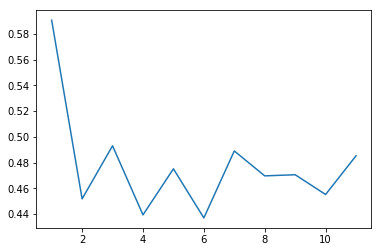

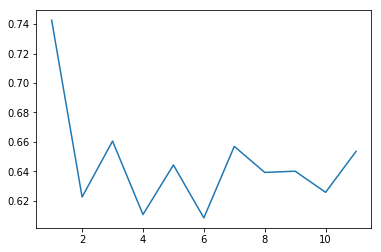

In [18]:
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
knn_jacc = []
knn_f1 = []
i_list = []
for i in range(1,12):
    n = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    knn_jacc.append(acc(n)[0])
    knn_f1.append(acc(n)[1])
    i_list.append(i)
plt.plot(i_list,knn_jacc)
plt.show()
plt.plot(i_list,knn_f1)
plt.show()

Since, max accuracy at k=3 i.e. not considering 1, since would be vulnerable to outliers.

In [19]:
n = KNeighborsClassifier(n_neighbors = 3).fit(X_train,Y_train)
knn = acc(n)

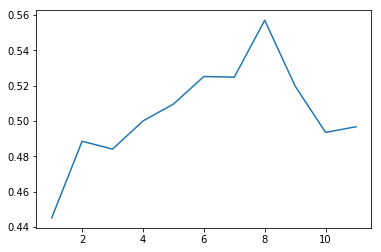

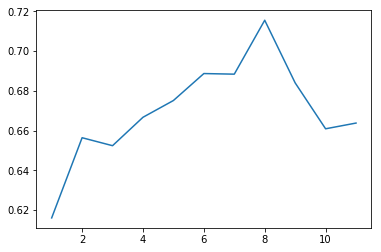

In [20]:
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
tree_jacc = []
tree_f1 = []
i_list = []
for i in range(1,12):
    t = DecisionTreeClassifier(criterion='entropy',max_depth=i)
    t.fit(X_train,Y_train)
    tree_jacc.append(acc(t)[0])
    tree_f1.append(acc(t)[1])
    i_list.append(i)
plt.plot(i_list,tree_jacc)
plt.show()
plt.plot(i_list,tree_f1)
plt.show()

Max accuracy seen at tree depth of 12.

In [21]:
t = DecisionTreeClassifier(criterion='entropy',max_depth=12)
t.fit(X_train,Y_train)
tree = acc(t)

In [22]:
from sklearn.linear_model import LogisticRegression
l = LogisticRegression(C=0.01,solver='liblinear').fit(X_train,Y_train)
lr = acc(l,'loss')

In [23]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,Y_train)
s = acc(clf)

In [24]:
print('Jaccard Index:')
print('KNN : ',knn[0])
print('Decision Tree : ',tree[0])
print('Logistic Regression : ',lr[0])
print('SVM : ',s[0])

Jaccard Index:
KNN :  0.4930555555555556
Decision Tree :  0.47468354430379744
Logistic Regression :  0.45390070921985815
SVM :  0.5671641791044776


In [25]:
print('F1 Score:')
print('KNN : ',knn[1])
print('Decision Tree : ',tree[1])
print('Logistic Regression : ',lr[1])
print('SVM : ',s[1])

F1 Score:
KNN :  0.6604651162790698
Decision Tree :  0.6437768240343348
Logistic Regression :  0.6243902439024391
SVM :  0.7238095238095238


In [26]:
print('Log Loss:')
print('Logistic Regression : ',lr[2])

Log Loss:
Logistic Regression :  4.5617498716327045


Log loss metric for logistic regression.